In [44]:
import tensorflow as tf

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL


In [47]:
data_dir = "C:/Users/Sk4re/engineerka/data"
data_dir = pathlib.Path(data_dir)

TRAIN_LENGTH = 48
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

img_height = 180
img_width = 180

In [48]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)
  

Found 30 files belonging to 3 classes.
Using 24 files for training.


In [49]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = "validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE)

Found 30 files belonging to 3 classes.
Using 6 files for validation.


In [50]:
class_names = train_ds.class_names
print(class_names)

['blind_curve', 'curve', 'straight']


In [51]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(24, 180, 180, 3)
(24,)


In [52]:
print(train_ds)
normalization_layer = tf.keras.layers.Rescaling(1./255)



<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


In [53]:
#roses = list(data_dir.glob('road_edges/*'))
#PIL.Image.open(str(roses[0]))


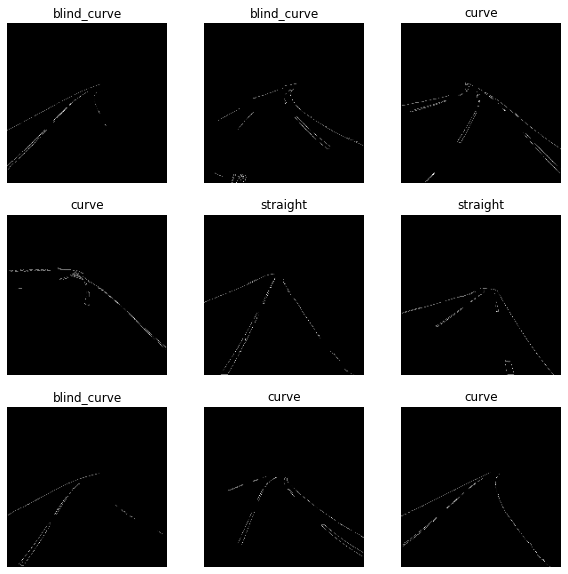

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [55]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(24, 180, 180, 3)
(24,)


In [56]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9717934


In [57]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9709222


In [58]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [59]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [63]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
1/1 [==============================] - 0s 391ms/step - loss: 0.5150 - accuracy: 0.9167 - val_loss: 1.1743 - val_accuracy: 0.3333
Epoch 2/3
1/1 [==============================] - 0s 460ms/step - loss: 0.3256 - accuracy: 0.9583 - val_loss: 1.5266 - val_accuracy: 0.1667
Epoch 3/3
1/1 [==============================] - 0s 417ms/step - loss: 0.1965 - accuracy: 1.0000 - val_loss: 1.9739 - val_accuracy: 0.1667


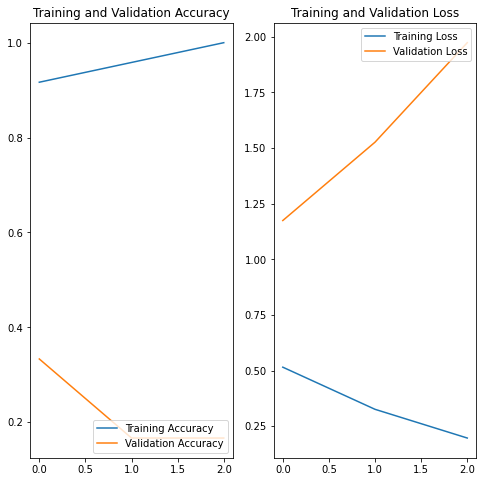

In [65]:
epochs = 3
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()